Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

Dataset => MNIST dataset (inbuit dataset in keras).  
This dataset contains the images (70,000 images) of handwritting digits.

Now, will load the data from keras library, and divide into train and test. 

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# (no. of images,pixel size(28,28))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Will see randomly how the array of that image looks like.

In [4]:
x_train[367]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  63, 255, 206,  88,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         26, 240, 253, 252,  70,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
        156, 252, 253, 186,  12,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150,
        252, 252, 240,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Now, will see the image of it. 

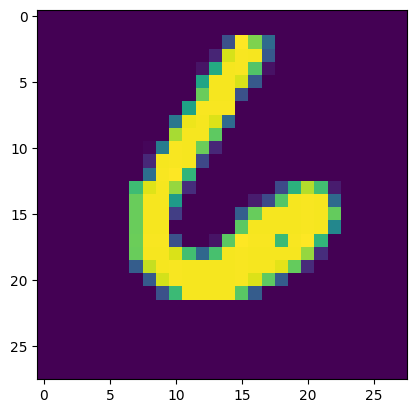

In [5]:
plt.imshow(x_train[367])

As we have see in the array of image above, the values are betweeen "0 - 255".  
We have to make the all values in the similar range to get a proper weight.  
So , will divide all the values of "x_train" and "x_test" by "255", to get in the range of "0 - 1".

In [6]:
x_train = x_train/255
x_test = x_test/255

Now, will see the value of the array of same index have taken above.

In [7]:
x_train[367]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24705882,
        1.        , 0.8078

Now, will make a model.

We will use "Flatten" function to make the 28*28 into "1-D array". 

We will use activation = 'relu' for "hidden Layer", as it is the best activation function.  
Their is 10 node in output for classifying the number (0 to 9), so will use activation = 'softmax' for "Output Layer". (It is not a binary classification)

In [8]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(10,activation= "softmax"))  # more than 1 node in output , so will use "softmax"


we will see the summary and total paraments of the ANN model.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will compile model, and "loss fuction = sparse_categorical_crossentropy" , because there is more than 1 node in "output layer".  
And optimizer is Adam (it is best optimizer)

In [10]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [11]:
history = model.fit(x_train,y_train, epochs=20, validation_split=0.2, )

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2910 - accuracy: 0.9161 - val_loss: 0.1765 - val_accuracy: 0.9491
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1294 - accuracy: 0.9626 - val_loss: 0.1129 - val_accuracy: 0.9689
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9741 - val_loss: 0.1116 - val_accuracy: 0.9685
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0668 - accuracy: 0.9800 - val_loss: 0.1038 - val_accuracy: 0.9687
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0900 - val_accuracy: 0.9731
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0920 - val_accuracy: 0.9737
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0865 - val_accuracy:

In [12]:
y_probability =model.predict(x_test)
y_probability

313/313 [==============================] - 1s 2ms/step


array([[4.6588171e-14, 4.7555045e-16, 1.4957441e-12, ..., 1.0000000e+00,
        2.3639053e-12, 8.1189183e-10],
       [1.3676614e-16, 2.3905683e-10, 1.0000000e+00, ..., 7.6227687e-22,
        6.0118739e-13, 1.9201734e-24],
       [5.3904194e-12, 9.9990642e-01, 1.2140622e-05, ..., 6.5310678e-06,
        7.4613134e-05, 6.6091493e-10],
       ...,
       [4.2172681e-27, 2.4145513e-19, 8.0979008e-25, ..., 2.1977940e-12,
        1.4366482e-14, 1.3550779e-09],
       [5.9429489e-19, 3.2321633e-25, 5.7798956e-25, ..., 1.7200035e-18,
        8.0548652e-09, 3.3002844e-21],
       [4.2727842e-17, 1.6476520e-23, 2.0449025e-17, ..., 4.3553493e-23,
        4.2650428e-20, 8.0621461e-25]], dtype=float32)

We got 10 values in each array (0 to 9), and like that we have 10,000 rows of array.

In [13]:
y_probability.shape

(10000, 10)

Now, we have find at which index of an each array of "y_probability" have the maximum value.

In [14]:
y_predict= y_probability.argmax(axis=1)
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

As we have predicted the values.  
So will check the accuracy score.

In [15]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_predict)
acc

0.9761

Now, will plot the graph of "Losses" and "accuracy".

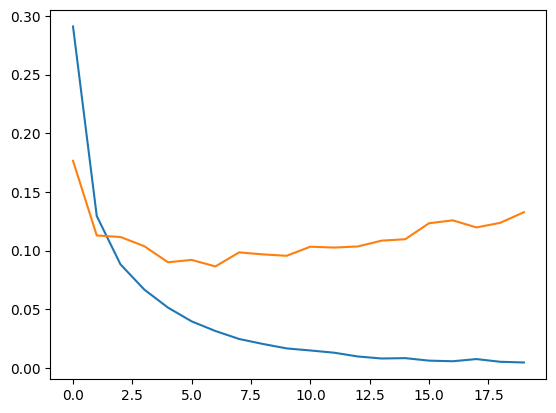

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

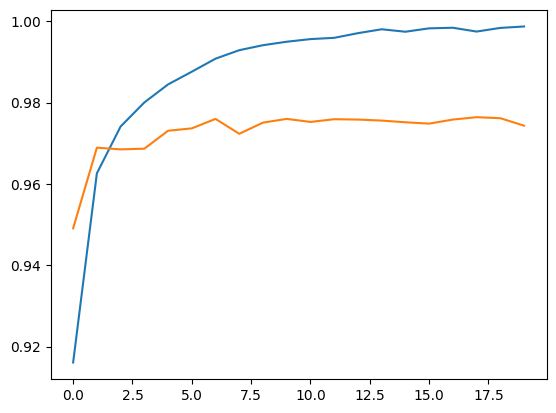

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

So, lets check our prediction.

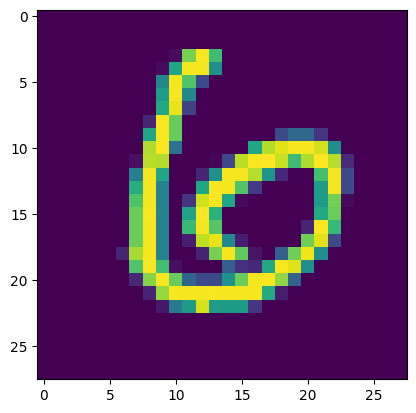

In [18]:
plt.imshow(x_test[11])  # will see by using model what is this number.

In [19]:
model.predict(x_test[11].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([6], dtype=int64)

So we got the output of "6".